In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Principal Component Analysis

Materia: Aprendizaje Automatico <br>
Docente: Esteban Roitberg <br>
Alumno: Gonzalo Jara

# ¿Que es PCA?

Es una tecnica de reduccion de dimensionalidad. <br>
Nos permite tomar una matriz de datos $X: n \times p$ con un $p$ muy grande y expresarla en un subespacio de "componentes principales" <br>

Por ejemplo: <br>
$X: n \times 50 \rightarrow \text{magia PCA} \rightarrow X_{PCA}: n \times 2$ <br>

Esas dos columnas son los 2 subespacios mas importantes de la matriz <br>

¿Que es esa "magia PCA"?

<!-- <img src="img/proyectados.png" alt="drawing" width="600"/> -->
<!-- ![proyectados](img/proyectados.png) -->
<!-- <img src="img/proyectados.png"  height=822 width=847/2/> -->

# ¿Cual es la idea de PCA?

<div class="flex-center">
    <img src="img/proyectados.png"  height=411 width=424/>
</div>

<style>
    .flex-center {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
    }
</style>

¿Por que en ese subespacio? <br>
¿Por que proyectamos? <br>
¿Por que se habla de varianza?

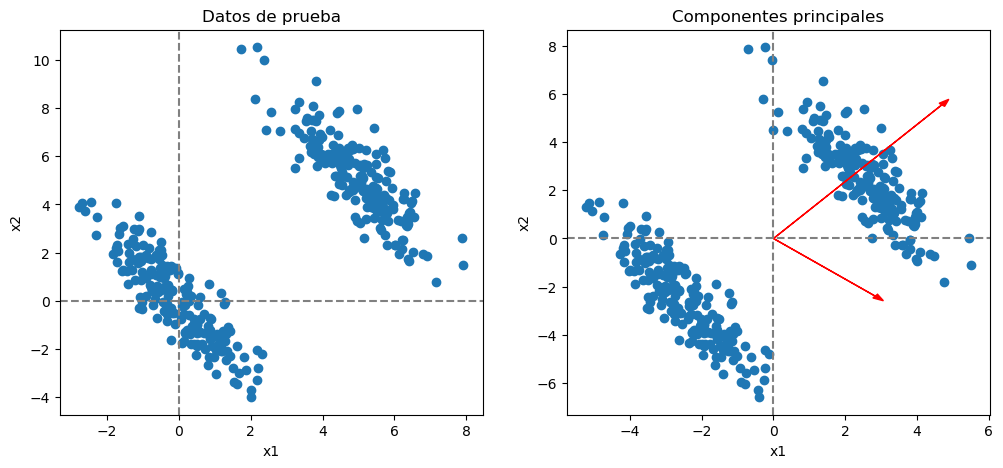

In [3]:
np.random.seed(2025)
theta = np.pi / 3
n = 400
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
x = np.concat([np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar,
               np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar + np.array([5, 5])])

_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x[:,0], x[:,1])
ax[0].axhline(0, color="gray", linestyle="--")
ax[0].axvline(0, color="gray", linestyle="--")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2");
ax[0].set_title("Datos de prueba");


b = x - x.mean(axis=0)
u, s, vt = np.linalg.svd(b, full_matrices=False)
scores = u @ np.diag(s)

ax[1].scatter(b[:,0], b[:,1]);

loadings = vt.T
for k in range(loadings.shape[0]):
    ax[1].arrow(0, 0,
                loadings[k, 0] * s[k] * 0.1, loadings[k, 1] * s[k] * 0.1,
                head_width=0.2,
                color="red")
ax[1].axhline(0, color="gray", linestyle="--")
ax[1].axvline(0, color="gray", linestyle="--")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2");
ax[1].set_title("Componentes principales");

# Mencionar varianza y otras proyecciones

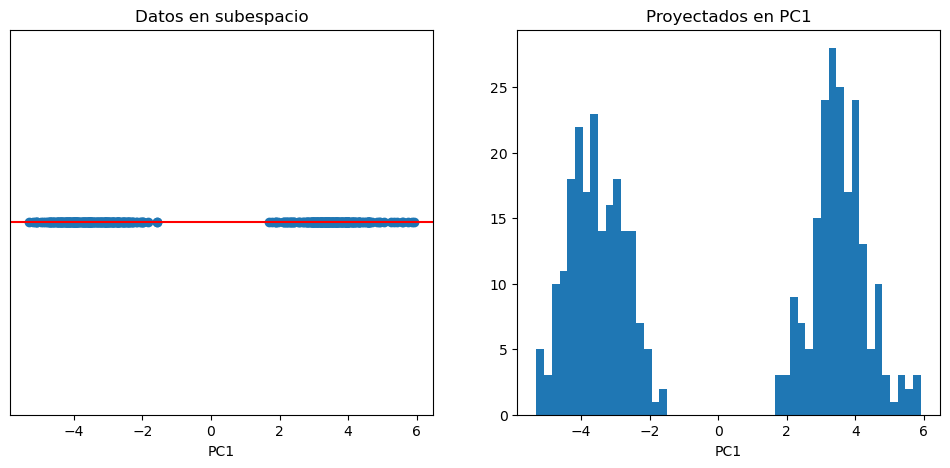

In [7]:
scores = u @ np.diag(s)
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(scores[:,0], np.zeros(scores.shape[0]));
ax[0].axhline(0, color="red")
ax[0].set_yticks([])
ax[0].set_xlabel("PC1")
ax[0].set_title("Datos en subespacio");

ax[1].hist(scores[:,0], bins=50);
ax[1].set_xlabel("PC1")
ax[1].set_title("Proyectados en PC1");


# ¿Como funciona por dentro?
Matriz de datos $B = X - \bar{X}$ de forma $B: n \times p$ <br>
Matriz de subespacios $V = [v_1 \, v_2 \, ... \, v_p]$ de forma $V: p \times p$ <br>
Los datos proyectados se les llama $Z_{score} = B \cdot V$ de forma $Z_{score}: n \times p$ <br>

Se busca hallar vectores $v_p$ que maximizen la varianza de los datos proyectados <br>
<!-- Recordar que se busca atrapar la mayor cantidad de varianza posible -->
$$
Var(Z_1) = \frac{1}{N} \sum_{n=1}^{N} \{ B_n \cdot v_1 \}^2 = v_1^T S v_1
$$ <br>

Con una restriccion: Quiero que el vector $v_1$ sea unitario
$$
v_1^T \cdot v_1 = 1
$$

Usamos multiplicadores de Lagrange

$$
\mathcal{L}(v_1, \lambda) = v_1^T S v_1 - \lambda (v_1^T \cdot v_1 - 1)
$$ <br>
Derivamos respecto a $v_1$ y hallamos los maximos
$$
\frac{\partial \mathcal{L}}{\partial v_1} = 2 S v_1 - 2\lambda v_1 = 0
$$ <br>

$$
S v_1 = \lambda v_1
$$

Autovectores!! <br>
Entonces para hallar cada subespacio se deben hallar los autovectores de $S = \frac{1}{N - 1} B^T B$ <br>

Entonces: <br>
Al calcular los autovectores se está resolviendo un problema de PCA <br>

<div class="flex-center">
    <img src="img/autovectores.png"  height=460 width=490/>
</div>

<style>
    .flex-center {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
    }
</style>

# ¿Relacion con SVD?

Esto se puede resolver a traves de SVD <br>


In [36]:
b[0,:] * vt[:,0]

array([-1.4217722 , -1.71214493])

In [43]:
S = (b.T @ b) / (b.shape[0] - 1)


In [52]:
np.round(vt[:,0] @ S @ vt.T[:,0], 4), np.round(vt[:,1] @ S @ vt.T[:,1], 4)

(np.float64(13.2413), np.float64(3.4465))

In [51]:
np.round((s**2) / (b.shape[0] - 1), 4)

array([13.2413,  3.4465])

In [37]:
b.shape, vt.shape

((400, 2), (2, 2))